<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/heart_disease_predict_%EC%9B%90%ED%95%AB%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




# df객체 만든다

In [ ]:
column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 
               'fbs',
               'restecg', 'thalach', 'exang', 'oldpeak', 
               'slope',
               'ca', 'thal', 'HeartDisease']
raw_data = pd.read_excel('./datasets/heart-disease.xlsx',
                         header=None, names=column_name)
print(raw_data.head(20))

    age  sex  cp  treshbps chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0    63    1   1       145  233    1        2      150      0      2.3      3   
1    67    1   4       160  286    0        0      108      1      1.5      2   
2    67    1   4       120    ?    0        2      129      1      2.6      2   
3    37    1   3       130  250    0        0      187      0      3.5      3   
4    41    0   2       130  204    0        2      172      0      1.4      1   
5    56    1   2       120  236    0        0      178      0      0.8      1   
6    62    0   4       140  268    0        2      160      0      3.6      3   
7    57    0   4       120  354    0        0      163      1      0.6      1   
8    63    1   4       130  254    0        2      147      0      1.4      2   
9    53    1   4       140  203    1        2      155      1      3.1      3   
10   57    1   4       140  192    0        0      148      0      0.4      2   
11   56    0   2       140  

In [ ]:
print(raw_data.describe().T)

              count        mean        std   min    25%    50%    75%    max
age           303.0   54.438944   9.038662  29.0   48.0   56.0   61.0   77.0
sex           303.0    0.679868   0.467299   0.0    0.0    1.0    1.0    1.0
cp            303.0    3.158416   0.960126   1.0    3.0    3.0    4.0    4.0
treshbps      303.0  131.689769  17.599748  94.0  120.0  130.0  140.0  200.0
fbs           303.0    0.148515   0.356198   0.0    0.0    0.0    0.0    1.0
restecg       303.0    0.983498   0.994883   0.0    0.0    0.0    2.0    2.0
thalach       303.0  149.607261  22.875003  71.0  133.5  153.0  166.0  202.0
exang         303.0    0.326733   0.469794   0.0    0.0    0.0    1.0    1.0
oldpeak       303.0    1.039604   1.161075   0.0    0.0    0.8    1.6    6.2
slope         303.0    1.600660   0.616226   1.0    1.0    2.0    2.0    3.0
HeartDisease  303.0    0.458746   0.499120   0.0    0.0    0.0    1.0    1.0


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshbps      303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  thal          303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


# 이상값을 결측값으로 대체 후
# 결측값 있는 row 삭제

In [ ]:
clean_data= raw_data.replace('?', np.nan)
clean_data= clean_data.dropna()
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  thal          296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB
None


# 입력컬럼 / 정답컬럼 분리
# training_data  /  target

In [ ]:
keep= column_name.pop()   #마지막꺼 빼서 keep에 넣고 원래의 column_name은 마지막 한개가 빠진 거 리턴받음
#keep이 심장병 진단 결과값이지
print(keep)
print(column_name)

HeartDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
training_data = clean_data[column_name]   #입력값
target= clean_data[[keep]]     #정답값
print(target)
print(training_data.head())   
print(target.head())
print(training_data.shape)
print(target.shape)

     HeartDisease
0               0
1               1
3               0
4               0
5               0
..            ...
297             1
298             1
299             1
300             1
301             1

[296 rows x 1 columns]
   age  sex  cp  treshbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   1       145  233.0    1        2      150      0      2.3   
1   67    1   4       160  286.0    0        0      108      1      1.5   
3   37    1   3       130  250.0    0        0      187      0      3.5   
4   41    0   2       130  204.0    0        2      172      0      1.4   
5   56    1   2       120  236.0    0        0      178      0      0.8   

   slope   ca  thal  
0      3  0.0   6.0  
1      2  3.0   3.0  
3      3  0.0   3.0  
4      1  0.0   3.0  
5      1  0.0   3.0  
   HeartDisease
0             0
1             1
3             0
4             0
5             0
(296, 13)
(296, 1)


In [ ]:
print(target[keep].sum())    #이진분류일때 0, 1 비율이 비슷해야지. 하나만 많으면 그냥 다 그거라고 대답해도 정확도가 높잖아. 그럼 그렇게 학습된다구 요인분석을 안하고.

136


In [ ]:
print(target[keep].mean())

0.4594594594594595


In [ ]:
#명목척도인 경우에는 원핫인코더를 해줌.       .......... 근데 강사님 귀차나서 원핫인코더 안하구 걍 다 스케일링 한댕
#비율척도- 수치형자료는 , 스케일링을 해주고.    자료타입별 다른 전처리.

# 입력컬럼 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)   #평균0 표준편차1인 정규분포 따르는 데이터로 바뀜.
print(type(scaled_data))  #ndarray니까 바꿔줘야함
scaled_data= pd.DataFrame(scaled_data, columns=column_name)
print(scaled_data.head())   #평균0 표준편차1인 정규분포 따르는 데이터를 가지는 df객체로 바뀜.
print(training_data.shape)
print(target.shape)


<class 'numpy.ndarray'>
        age       sex        cp  treshbps      chol       fbs   restecg  \
0  0.942285  0.692820 -2.236793  0.747441 -0.277228  2.425638  1.020526   
1  1.385714  0.692820  0.876486  1.592523  0.742265 -0.412263 -0.993312   
2 -1.939999  0.692820 -0.161274 -0.097641  0.049779 -0.412263 -0.993312   
3 -1.496571 -1.443376 -1.199033 -0.097641 -0.835064 -0.412263  1.020526   
4  0.166286  0.692820 -1.199033 -0.661029 -0.219521 -0.412263 -0.993312   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.014451 -0.692820  1.074839  2.264087 -0.718421  0.660262  
1 -1.818794  1.443376  0.386756  0.645320  2.487397 -0.890830  
2  1.629453 -0.692820  2.106963  2.264087 -0.718421 -0.890830  
3  0.974723 -0.692820  0.300746 -0.973448 -0.718421 -0.890830  
4  1.236615 -0.692820 -0.215316 -0.973448 -0.718421 -0.890830  
(296, 13)
(296, 1)


# sex 값도 걍 다 수치로 생각해서 스케일링 때려박음

In [ ]:
print(scaled_data.describe().T)    #모든데이터가 평균은 0 표준편차는 1정도 따르는 값으로 스케일링 됐지

          count          mean       std       min       25%       50%  \
age       296.0  4.500904e-18  1.001693 -2.826856 -0.720571  0.166286   
sex       296.0  2.850573e-17  1.001693 -1.443376 -1.443376  0.692820   
cp        296.0  1.200241e-16  1.001693 -2.236793 -0.161274 -0.161274   
treshbps  296.0  6.067781e-16  1.001693 -2.125838 -0.661029 -0.097641   
chol      296.0  1.997276e-17  1.001693 -2.335451 -0.700414 -0.084871   
fbs       296.0  7.501507e-19  1.001693 -0.412263 -0.412263 -0.412263   
restecg   296.0  2.182939e-16  1.001693 -0.993312 -0.993312 -0.489853   
thalach   296.0  6.458797e-16  1.001693 -3.433796 -0.694840  0.145397   
exang     296.0  5.926190e-17  1.001693 -0.692820 -0.692820 -0.692820   
oldpeak   296.0 -7.951597e-17  1.001693 -0.903399 -0.903399 -0.215316   
slope     296.0  1.155232e-16  1.001693 -0.973448 -0.973448  0.645320   
ca        296.0  6.526311e-17  1.001693 -0.718421 -0.718421 -0.718421   
thal      296.0 -2.663035e-17  1.001693 -0.890830 -

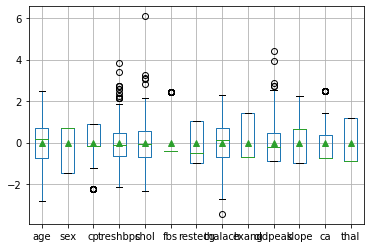

In [ ]:
scaled_data.boxplot(column=column_name, showmeans=True)  #df에 boxplot하면 그려짐
plt.show()

# 학습용과 검증용 나눔

In [ ]:
#과적합 방지 위해 검증용 데이터 일부 떼어놓음.


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, target, test_size=0.3 )         #입력데이터, 출력데이터, 검증용 30프로로 나눠라
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)




X_train: (207, 13)
X_test: (89, 13)
Y_train: (207, 1)
Y_test: (89, 1)


# 모델 인풋차원과 활성화함수 만듦

In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=13, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  #맨마지막은 퍼셈트론 1개고 활성화함수는 시그모이드로 하면되지 분류니까0이냐 1이냐만 보면 되니까
model.summary()


#Dropout?
# 매 에폭마다 weight중에 0.25(25프로를) 학습을 안 해. wieght랑 bias수정을 안한다는거. 특징 일부를 빼고 학습해도 맞출 수 있도록. 너무 과민하게 반응하지 않도록 해준다!@!!





#첫번째 파람 7168은, 인풋 13 x weight 512  + bias 512의 의미다
#두번째 파람은 (512+1) x 256

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 512)               7168      
                                                                 
 dropout_45 (Dropout)        (None, 512)               0         
                                                                 
 dense_58 (Dense)            (None, 256)               131328    
                                                                 
 dropout_46 (Dropout)        (None, 256)               0         
                                                                 
 dense_59 (Dense)            (None, 128)               32896     
                                                                 
 dropout_47 (Dropout)        (None, 128)               0         
                                                                 
 dense_60 (Dense)            (None, 1)               

# 모델 학습시키기

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size= 50, epochs=10, validation_split= 0.2, verbose=1)
#validation_split  : 매 에폭마다 이번에 넣은 데이터중 20% 때서, 80퍼로 학습하고 20퍼로 검증. 그래서 val_accuracy 검증정확도를 저장함. 매 에폭마다.
#batch_size= 50개 풀고, mse구해서 조절하고, 그다음 50개 풀고 mse구해서 조절하고... 이런식으로. 한 애폭 내에서도 나눠서 진행. 이러면 매 애폭마다 향상되는 게 좋음 시간은 좀더걸리지만.


Epoch 1/10
4/4 [==============================] - 1s 60ms/step - loss: 0.2286 - binary_accuracy: 0.6121 - val_loss: 0.2014 - val_binary_accuracy: 0.7619
Epoch 2/10
4/4 [==============================] - 0s 13ms/step - loss: 0.1515 - binary_accuracy: 0.8545 - val_loss: 0.1680 - val_binary_accuracy: 0.7857
Epoch 3/10
4/4 [==============================] - 0s 17ms/step - loss: 0.1115 - binary_accuracy: 0.8545 - val_loss: 0.1501 - val_binary_accuracy: 0.7857
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0964 - binary_accuracy: 0.8545 - val_loss: 0.1544 - val_binary_accuracy: 0.7857
Epoch 5/10
4/4 [==============================] - 0s 16ms/step - loss: 0.0899 - binary_accuracy: 0.8667 - val_loss: 0.1681 - val_binary_accuracy: 0.7619
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0805 - binary_accuracy: 0.8970 - val_loss: 0.1703 - val_binary_accuracy: 0.7857
Epoch 7/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0744 - bi

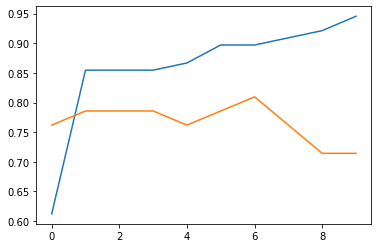

In [ ]:
plt.plot(fit_hist.history['binary_accuracy'])   #테스트용 70 중 80퍼 가지고 구한 학습정확도. loss 계산으로.. 근데 분류할때는 loss는 상관없지. 정확도만 보면됨.
                                        #이진분류가 얼마나 잘 됐는지.

plt.plot(fit_hist.history['val_binary_accuracy'])  #이거는 검증정확도임.  검증정확도는 낮아지네?  과적합이 일어났다는 거임.
plt.show()

In [ ]:
score= model.evaluate(X_test, Y_test, verbose=0)   #검증할 거임   #X가 입력 Y가 타겟. 
#이때는 forward만 가서 mse, 정확도만 구함.  테스트셋에 대한 학습은 x.
print('keras DNN model loss :', score[0])
print('keras DNN model accuracy:', score[1])

keras DNN model loss : 0.16252577304840088
keras DNN model accuracy: 0.7865168452262878


# 원핫인코더 방식으로 하려면

In [ ]:
training_data.info()

print(training_data.shape)
print(target.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    int64  
 2   cp        296 non-null    int64  
 3   treshbps  296 non-null    int64  
 4   chol      296 non-null    float64
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    int64  
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    int64  
 11  ca        296 non-null    float64
 12  thal      296 non-null    float64
dtypes: float64(4), int64(9)
memory usage: 32.4 KB
(296, 13)
(296, 1)


# 입력데이터를 수치값인 value_data와, 원핫인코더로 쓸 training_data로 나눈다.

In [ ]:
value_data=training_data[['age', 'treshbps', 'chol', 'thalach', 'oldpeak']]
print(value_data.head())
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data = scaler.fit_transform(value_data)
value_data= pd.DataFrame(scaled_data, columns=value_data.columns)  #여기서 얘는 넌빠진 울퉁불퉁 인덱스 아니고 새롭게 쫙
training_data.drop(['age', 'treshbps', 'chol', 'thalach', 'oldpeak'], axis=1, inplace=True)

print(training_data.shape)
print(target.shape)

   age  treshbps   chol  thalach  oldpeak
0   63       145  233.0      150      2.3
1   67       160  286.0      108      1.5
3   37       130  250.0      187      3.5
4   41       130  204.0      172      1.4
5   56       120  236.0      178      0.8
(296, 8)
(296, 1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# training_data를 get_dummies 사용해서 onehot_data로 만듦

In [ ]:
onehot_data= pd.get_dummies(training_data, columns=training_data.columns)
print(onehot_data.head())

print(training_data.shape)
print(target.shape)

   sex_0  sex_1  cp_1  cp_2  cp_3  cp_4  fbs_0  fbs_1  restecg_0  restecg_1  \
0      0      1     1     0     0     0      0      1          0          0   
1      0      1     0     0     0     1      1      0          1          0   
3      0      1     0     0     1     0      1      0          1          0   
4      1      0     0     1     0     0      1      0          0          0   
5      0      1     0     1     0     0      1      0          1          0   

   ...  slope_1  slope_2  slope_3  ca_0.0  ca_1.0  ca_2.0  ca_3.0  thal_3.0  \
0  ...        0        0        1       1       0       0       0         0   
1  ...        0        1        0       0       0       0       1         1   
3  ...        0        0        1       1       0       0       0         1   
4  ...        1        0        0       1       0       0       0         1   
5  ...        1        0        0       1       0       0       0         1   

   thal_6.0  thal_7.0  
0         1         0  
1 

In [ ]:
print(onehot_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sex_0      296 non-null    uint8
 1   sex_1      296 non-null    uint8
 2   cp_1       296 non-null    uint8
 3   cp_2       296 non-null    uint8
 4   cp_3       296 non-null    uint8
 5   cp_4       296 non-null    uint8
 6   fbs_0      296 non-null    uint8
 7   fbs_1      296 non-null    uint8
 8   restecg_0  296 non-null    uint8
 9   restecg_1  296 non-null    uint8
 10  restecg_2  296 non-null    uint8
 11  exang_0    296 non-null    uint8
 12  exang_1    296 non-null    uint8
 13  slope_1    296 non-null    uint8
 14  slope_2    296 non-null    uint8
 15  slope_3    296 non-null    uint8
 16  ca_0.0     296 non-null    uint8
 17  ca_1.0     296 non-null    uint8
 18  ca_2.0     296 non-null    uint8
 19  ca_3.0     296 non-null    uint8
 20  thal_3.0   296 non-null    uint8
 21  thal_6.0   296 n

In [ ]:
print(value_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   treshbps  296 non-null    float64
 2   chol      296 non-null    float64
 3   thalach   296 non-null    float64
 4   oldpeak   296 non-null    float64
dtypes: float64(5)
memory usage: 11.7 KB
None


In [ ]:
print(onehot_data.info())

print(training_data.shape)
print(target.shape)
print(onehot_data.shape)
print(value_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sex_0      296 non-null    uint8
 1   sex_1      296 non-null    uint8
 2   cp_1       296 non-null    uint8
 3   cp_2       296 non-null    uint8
 4   cp_3       296 non-null    uint8
 5   cp_4       296 non-null    uint8
 6   fbs_0      296 non-null    uint8
 7   fbs_1      296 non-null    uint8
 8   restecg_0  296 non-null    uint8
 9   restecg_1  296 non-null    uint8
 10  restecg_2  296 non-null    uint8
 11  exang_0    296 non-null    uint8
 12  exang_1    296 non-null    uint8
 13  slope_1    296 non-null    uint8
 14  slope_2    296 non-null    uint8
 15  slope_3    296 non-null    uint8
 16  ca_0.0     296 non-null    uint8
 17  ca_1.0     296 non-null    uint8
 18  ca_2.0     296 non-null    uint8
 19  ca_3.0     296 non-null    uint8
 20  thal_3.0   296 non-null    uint8
 21  thal_6.0   296 n

### get_dummies 사용하면서 onehot_data객체 만들 때 인덱스가 리셋됐음.
### 그러니까 value_Data 인덱스도 리셋해주자 인덱스 맞춰주게.. (아우터 조인 발생 안하게)

In [ ]:
onehot_data.reset_index(drop=True, inplace=True)
value_data.reset_index(drop=True, inplace=True)


In [ ]:
training_data= pd.concat((onehot_data, value_data), axis=1)
print(training_data.info())

print(training_data.shape)
print(target.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex_0      296 non-null    uint8  
 1   sex_1      296 non-null    uint8  
 2   cp_1       296 non-null    uint8  
 3   cp_2       296 non-null    uint8  
 4   cp_3       296 non-null    uint8  
 5   cp_4       296 non-null    uint8  
 6   fbs_0      296 non-null    uint8  
 7   fbs_1      296 non-null    uint8  
 8   restecg_0  296 non-null    uint8  
 9   restecg_1  296 non-null    uint8  
 10  restecg_2  296 non-null    uint8  
 11  exang_0    296 non-null    uint8  
 12  exang_1    296 non-null    uint8  
 13  slope_1    296 non-null    uint8  
 14  slope_2    296 non-null    uint8  
 15  slope_3    296 non-null    uint8  
 16  ca_0.0     296 non-null    uint8  
 17  ca_1.0     296 non-null    uint8  
 18  ca_2.0     296 non-null    uint8  
 19  ca_3.0     296 non-null    uint8  
 20  thal_3.0  

In [ ]:
print(training_data.shape)
print(target.shape)

(296, 28)
(296, 1)


# 학습용 검증용 데이터 분리하고

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    training_data, target, test_size=0.2
)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(236, 28) (236, 1)
(60, 28) (60, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 모델 만들고

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim = 28, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 128)               3712      
                                                                 
 dropout_48 (Dropout)        (None, 128)               0         
                                                                 
 dense_62 (Dense)            (None, 256)               33024     
                                                                 
 dropout_49 (Dropout)        (None, 256)               0         
                                                                 
 dense_63 (Dense)            (None, 512)               131584    
                                                                 
 dropout_50 (Dropout)        (None, 512)               0         
                                                                 
 dense_64 (Dense)            (None, 128)             

# 모델 학습시킨다

In [ ]:
model.compile(loss='mse', optimizer = 'adam',
              metrics=['binary_accuracy'])
fit_hist = model.fit(
    X_train, Y_train, batch_size=50, epochs=10,
    validation_split=0.2, verbose=1
)

Epoch 1/10
4/4 [==============================] - 1s 70ms/step - loss: 0.2312 - binary_accuracy: 0.6702 - val_loss: 0.1902 - val_binary_accuracy: 0.8333
Epoch 2/10
4/4 [==============================] - 0s 15ms/step - loss: 0.1589 - binary_accuracy: 0.8351 - val_loss: 0.1269 - val_binary_accuracy: 0.8542
Epoch 3/10
4/4 [==============================] - 0s 15ms/step - loss: 0.1172 - binary_accuracy: 0.8617 - val_loss: 0.1366 - val_binary_accuracy: 0.8125
Epoch 4/10
4/4 [==============================] - 0s 15ms/step - loss: 0.1021 - binary_accuracy: 0.8404 - val_loss: 0.1275 - val_binary_accuracy: 0.8125
Epoch 5/10
4/4 [==============================] - 0s 15ms/step - loss: 0.0817 - binary_accuracy: 0.9096 - val_loss: 0.1329 - val_binary_accuracy: 0.7917
Epoch 6/10
4/4 [==============================] - 0s 16ms/step - loss: 0.0714 - binary_accuracy: 0.8989 - val_loss: 0.1443 - val_binary_accuracy: 0.7917
Epoch 7/10
4/4 [==============================] - 0s 16ms/step - loss: 0.0735 - bi

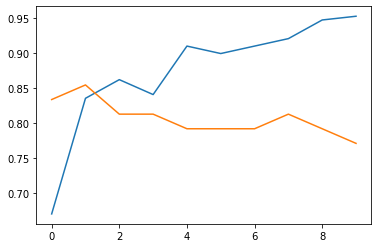

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()   #그림보니 7에폭정도가 적당할거같지

# 검증용 데이터로 모델 검증한다

In [ ]:
score= model.evaluate(X_test, Y_test, verbose=0)
print('loss', score[0])
print('accuracy', score[1])

loss 0.1528632789850235
accuracy 0.800000011920929
